In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs4

In [2]:
# URL website
url = 'https://books.toscrape.com/'

# Mengirim permintaan GET ke URL
response = requests.get(url)

# Memastikan respons berhasil
if response.status_code == 200:
    # Parsing HTML dengan BeautifulSoup
    soup = bs4(response.content, 'html.parser')
    
    # Mendapatkan semua judul buku
    titles = soup.find_all('h3')
    book_titles = [title.a['title'] for title in titles]
    
  # Mendapatkan semua harga buku
    prices = soup.find_all('p', class_='price_color')
    book_prices = [float(price.text[1:]) for price in prices]  # Harga disimpan sebagai float
    
    # Mendapatkan semua rating buku
    ratings = soup.find_all('p', class_='star-rating')
    book_ratings = [rating['class'][1] for rating in ratings]
    
    # Menampilkan hasil
    for title, price, rating in zip(book_titles, book_prices, book_ratings):
        print(f"Judul: {title}, Harga: {price}, Rating: {rating}")
else:
    print("Gagal mengambil data dari website.")

Judul: A Light in the Attic, Harga: 51.77, Rating: Three
Judul: Tipping the Velvet, Harga: 53.74, Rating: One
Judul: Soumission, Harga: 50.1, Rating: One
Judul: Sharp Objects, Harga: 47.82, Rating: Four
Judul: Sapiens: A Brief History of Humankind, Harga: 54.23, Rating: Five
Judul: The Requiem Red, Harga: 22.65, Rating: One
Judul: The Dirty Little Secrets of Getting Your Dream Job, Harga: 33.34, Rating: Four
Judul: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull, Harga: 17.93, Rating: Three
Judul: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics, Harga: 22.6, Rating: Four
Judul: The Black Maria, Harga: 52.15, Rating: One
Judul: Starving Hearts (Triangular Trade Trilogy, #1), Harga: 13.99, Rating: Two
Judul: Shakespeare's Sonnets, Harga: 20.66, Rating: Four
Judul: Set Me Free, Harga: 17.46, Rating: Five
Judul: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1), Harga: 52.29, Rating: Five
Judul: Ri

In [3]:
# Menampilkan hasil
for title, price, rating in zip(book_titles, book_prices, book_ratings):
    print(f"Judul: {title}, Harga: {price}, Rating: {rating}")

# Convert scraped data to DataFrame
data = pd.DataFrame({
    'Judul': book_titles,
    'Harga': book_prices,
    'Rating': book_ratings
})

# Save DataFrame to CSV file
data.to_csv('book_data.csv', index=False)
print("Data berhasil disimpan sebagai file CSV: 'book_data.csv'")

Judul: A Light in the Attic, Harga: 51.77, Rating: Three
Judul: Tipping the Velvet, Harga: 53.74, Rating: One
Judul: Soumission, Harga: 50.1, Rating: One
Judul: Sharp Objects, Harga: 47.82, Rating: Four
Judul: Sapiens: A Brief History of Humankind, Harga: 54.23, Rating: Five
Judul: The Requiem Red, Harga: 22.65, Rating: One
Judul: The Dirty Little Secrets of Getting Your Dream Job, Harga: 33.34, Rating: Four
Judul: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull, Harga: 17.93, Rating: Three
Judul: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics, Harga: 22.6, Rating: Four
Judul: The Black Maria, Harga: 52.15, Rating: One
Judul: Starving Hearts (Triangular Trade Trilogy, #1), Harga: 13.99, Rating: Two
Judul: Shakespeare's Sonnets, Harga: 20.66, Rating: Four
Judul: Set Me Free, Harga: 17.46, Rating: Five
Judul: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1), Harga: 52.29, Rating: Five
Judul: Ri

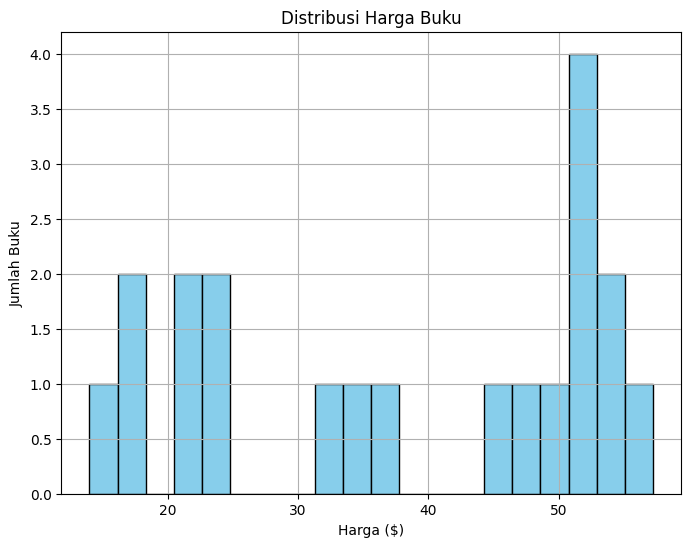

In [4]:
# Membuat histogram untuk distribusi harga buku
plt.figure(figsize=(8, 6))
plt.hist(book_prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Buku')
plt.xlabel('Harga ($)')
plt.ylabel('Jumlah Buku')
plt.grid(True)
plt.show()

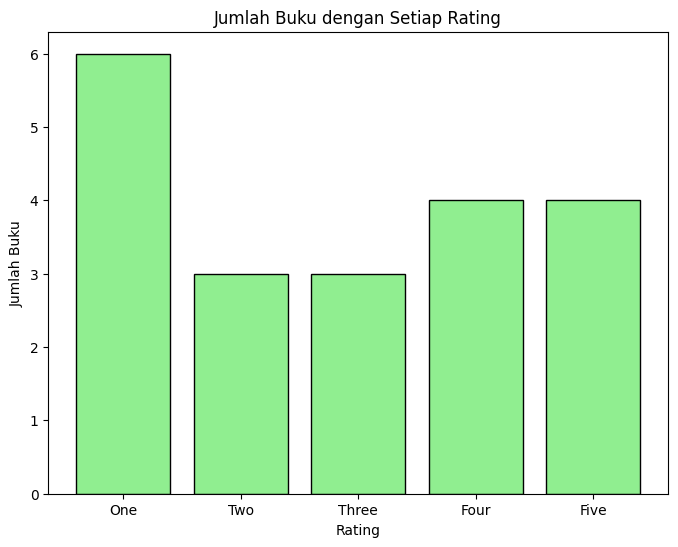

In [5]:
# Membuat histogram untuk jumlah buku dengan setiap rating
rating_counts = {'One': 0, 'Two': 0, 'Three': 0, 'Four': 0, 'Five': 0}
for rating in book_ratings:
    rating_counts[rating] += 1

ratings = list(rating_counts.keys())
counts = list(rating_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(ratings, counts, color='lightgreen', edgecolor='black')
plt.title('Jumlah Buku dengan Setiap Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.show()

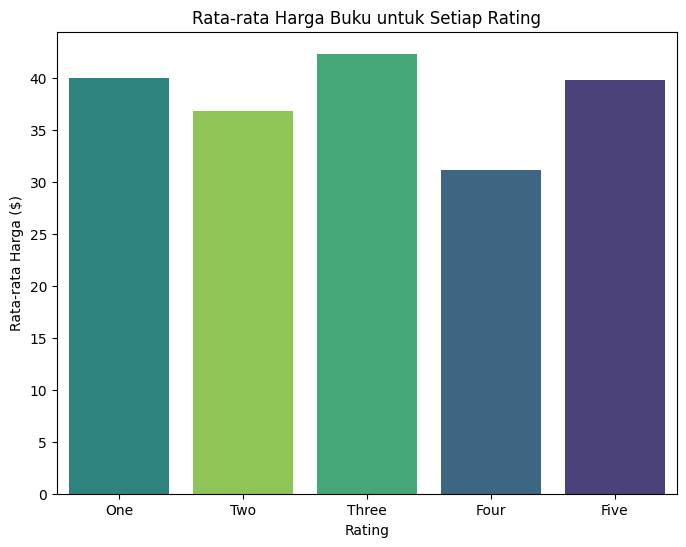

In [6]:
plt.figure(figsize=(8, 6))
average_price_by_rating = data.groupby('Rating')['Harga'].mean().reset_index()
sns.barplot(x='Rating', y='Harga', hue='Rating', data=average_price_by_rating, palette='viridis', order=['One', 'Two', 'Three', 'Four', 'Five'], legend=False)
plt.xlabel('Rating')
plt.ylabel('Rata-rata Harga ($)')
plt.title('Rata-rata Harga Buku untuk Setiap Rating')
plt.show()